# Iniziare a lavorare con i PDF

Prima di iniziare qualunque analisi automatica di un PDF, è fondamentale capire che tipo di contenuto contiene il file. Non tutti i PDF sono uguali: alcuni includono testo vero e proprio (in formato **PostScript digitale**), mentre altri sono semplicemente immagini scannerizzate, senza informazioni testuali interne.

La distinzione è importante perché determina il metodo da usare per estrarre il contenuto:

* Se il PDF contiene testo digitale, librerie come PyMuPDF o pdfplumber possono leggerlo direttamente. L’estrazione è veloce, accurata e non richiede passaggi extra.

* Se invece il PDF è composto da immagini, il testo non è realmente “testo”, ma solo un’immagine. In questo caso serve prima applicare un passaggio di OCR (Optical Character Recognition), ad esempio con Tesseract, per trasformare le immagini in testo analizzabile.

Un modo molto semplice per fare questa verifica è aprire manualmente il PDF e provare a selezionare il testo con il mouse: se si riesce a evidenziarlo, allora è testo digitale; altrimenti, probabilmente sei davanti a un PDF composto da immagini.

## Analisi di un PDF con PostScript Digitale

### Moduli e Librerie
In questo caso non abbiamo bisogno dell’OCR, perché abbiamo verificato che **il testo del documento è già selezionabile**: questo significa che il PDF contiene testo digitale e non semplici immagini.

Per estrarre il testo dal PDF utilizzeremo la libreria **PyMuPDF**, una libreria specializzata per lavorare con i documenti PDF, e nello specifico il modulo **fitz**. PyMuPDF funziona molto bene con PDF che hanno già testo incorporato mentre nei PDF scannerizzati o in quelli in cui il testo non è leggibile da Python, questo metodo non è utilizzabile e dobbiamo ricorrere al riconoscimento del testo (OCR), una tecnica più complessa e soggetta a errori. Per questo motivo, quando possibile, è preferibile utilizzare direttamente PyMuPDF sui PDF con testo incorporato.

Iniziamo quindi ad installare PyMuPDF (`!pip install PyMuPDF`) e poi importiamo la libreria che ci interessa (`import fitz`):

In [22]:
!pip install PyMuPDF

In [1]:
import fitz  # Modulo preso da PyMuPDF

**Nota bene**

Per poter lavorare sul nostro PDF dobbiamo prima indicare a Python **dove** si trova il file che vogliamo analizzare. Nel codice che mostreremo, il PDF da analizzare (“othello_PDF_FolgerShakespeare.pdf”) si trova nella stessa cartella del notebook contenente lo script Python da cui eseguiamo i comandi.

Non è obbligatorio che il file sia nella stessa cartella: se il PDF è salvato altrove, basta modificare il percorso nel codice. Tuttavia, se non si ha molta familiarità con i percorsi dei file, è consigliabile tenere il PDF nella stessa directory del progetto per evitare confusione e rendere il lavoro più semplice.

### Aprire file PDF 
Nel seguente passaggio si sta dicendo a Python quale file PDF deve essere analizzato, indicando dove si trova (attraverso il **percorso del file** o **path**). Subito dopo, si utilizza la libreria PyMuPDF per aprirlo e renderlo pronto per essere "letto":

* utilizzando la libreria pathlib, creiamo un oggetto del file indicando il suo percorso: `pdf_path = Path("othello_PDF_FolgerShakespeare.pdf")`;
* utilizzando la libreria PyMuPDF apriamo il documento, pronto per essere "letto": `doc = fitz.open(pdf_path)`;

In [2]:
from pathlib import Path

# 1. Indicare il percorso del PDF
pdf_path = Path("othello_PDF_FolgerShakespeare.pdf")  # crea un oggetto Path

# 2. Aprire il PDF
doc = fitz.open(pdf_path)

Nei passaggi successivi si legge tutto il testo presente nel PDF, pagina per pagina, attraverso un'**iterazione**. In questo modo, il testo estratto da ciascuna pagina viene aggiunto alla variabile **full_text**, che al termine delle iterazioni (quando non ci sono più pagine da leggere) conterrà l’intero testo del documento in un’unica variabile.

In [3]:
# 3. Estrarre il testo di tutte le pagine

full_text = "" #creiamo una variabile vuota che poi andremo a riempire con il testo estratto
for i, page in enumerate(doc): #per ogni pag. nel documento ripetiamo gli step successivi:
    text = page.get_text()  #estrae tutto il testo della pagina
    if text:  #controlla che ci sia testo
        full_text += text + "\n"  #aggiunge il testo estratto alla variabile full_text, aggiungendo un ritorno a capo tra le pagine
#ritorna all'inizio per fare una nuova iterazione

È possibile verificare se il testo è stato importato correttamente nella variabile con il passaggio seguente, in cui si sceglie una pagina da visualizzare direttamente nel notebook. Questo controllo non è necessario, ma può essere utile per individuare eventuali errori evidenti nell’importazione del testo.

In [47]:
# 4. Controllo rapido:
pagina_num = 19
page = doc[pagina_num - 1]
text_pag19 = page.get_text()
print(f"Pagina {pagina_num}:\n{text_pag19}")

Pagina 19:
29
Othello
ACT 1. SC. 3
DUKE
FIRST SENATOR
DUKE
SECOND SENATOR
DUKE
SAILOR
OFFICER
DUKE
SAILOR
He exits.
DUKE
FIRST SENATOR
Enter Duke, Senators, and Officers.
, reading a paper
 
 There’s no composition in these  news
 That gives them credit.
, reading a paper
 
 Indeed, they are disproportioned.
 My letters say a hundred and seven galleys.
 
 And mine, a hundred forty.
, reading a paper
 
 And mine, two hundred.
 But though they jump not on a just account
 (As in these cases, where the aim reports
 ’Tis oft with difference), yet do they all confirm
 A Turkish fleet, and bearing up to Cyprus.
 
 Nay, it is possible enough to judgment.
 I do not so secure me in the error,
 But the main article I do approve
 In fearful sense.
, within   
 What ho, what ho, what ho!
Enter Sailor.
  A messenger from the galleys.
  Now, what’s the business?
 
 The Turkish preparation makes for Rhodes.
 So was I bid report here to the state
 By Signior Angelo. 
 
 How say you by this change?
  
 

## Analisi
Una volta aperto il PDF, possiamo iniziare a esplorare diverse possibilità di analisi testuale. I passaggi che seguono mostrano, in maniera esemplificativa, alcune delle tecniche che si possono applicare per estrarre informazioni e visualizzare i contenuti del documento.

### Wordclouds

Per analizzare rapidamente i temi principali presenti in un testo, è possibile utilizzare una **word cloud**, o “nuvola di parole”. Una word cloud è una rappresentazione grafica dei termini contenuti in un testo, in cui la **dimensione di ciascuna parola** è **proporzionale alla sua frequenza**. In altre parole, le parole che compaiono più spesso nel testo risaltano visivamente, permettendo di individuare rapidamente concetti chiave, temi ricorrenti e termini di interesse.

Per ottenere una word cloud significativa, è necessario prima effettuare una **tokenization** ovver suddividere il testo in unità più piccole chiamate token, solitamente parole singole (unigrams). Questo passaggio permette di lavorare con ogni parola come elemento separato. Dopo questa suddivisione si contano le **occorrenze** di ciascuna parola per determinare quali termini sono più ricorrenti nel testo.

In [58]:
tokenized_full_text = full_text.split() #dividiamo il testo su base degli spazi

unigrams_full_text = [] #lista che conterrà i unigrams

for token in tokenized_full_text: 
    token = token.lower() #uniformiamo il testo rendendo tutto minuscolo

    for char in ['.', '!', '?', ',', ';', ':', '—', '-', '"', '“', '”', "'", '(', ')', '[', ']', '…']: #rimuoviamo i caratteri di punteggiatura comuni
        token = token.replace(char, '')

    token = token.strip() #togliamo gli spazi in eccesso e newline attaccati

    if token:  #elimina token vuoti del tipo ''
        unigrams_full_text.append(token) #aggiungiamo il token alla lista precedente

from collections import Counter
unigrams_count = Counter(unigrams_full_text) #per ogni unigramma contiamo le occorrenze
print(unigrams_count.most_common(50)) #mostriamo i primi 50 per un primo controllo

[('ftln', 3683), ('and', 824), ('i', 817), ('the', 772), ('to', 641), ('of', 485), ('you', 482), ('a', 461), ('othello', 459), ('my', 430), ('that', 382), ('iago', 371), ('in', 360), ('not', 321), ('is', 316), ('it', 314), ('me', 275), ('he', 260), ('cassio', 251), ('for', 249), ('with', 232), ('this', 227), ('desdemona', 227), ('her', 225), ('be', 224), ('but', 224), ('do', 220), ('your', 213), ('have', 211), ('what', 180), ('him', 178), ('his', 175), ('as', 175), ('she', 164), ('so', 161), ('will', 154), ('thou', 143), ('act', 141), ('if', 141), ('o', 138), ('emilia', 136), ('on', 122), ('by', 121), ('sc', 121), ('are', 112), ('roderigo', 112), ('now', 105), ('no', 101), ('all', 98), ('shall', 97)]


Come si nota dai primi risultati, potremmo voler pulire il testo, eliminando le parole che non sono particolarmente informative per la nostra analisi. Queste parole, chiamate **stop words**, sono termini molto comuni in una lingua, come congiunzioni, preposizioni o articoli (ad esempio *“and”, “the”, “of”* in inglese, o *“e”, “il”, “di”* in italiano), che compaiono spesso ma non portano significato rilevante per comprendere il contenuto principale del testo.

Nel metodo più semplice, è possibile creare una lista o un insieme di stop words da eliminare dagli unigrammi già estratti. Filtrando queste parole, possiamo ottenere un insieme di termini più “interessanti”, utili per analisi successive come il conteggio delle parole più frequenti o la creazione di una word cloud, evidenziando i concetti chiave presenti nel testo.

Questo approccio non solo rende i risultati più leggibili e significativi, ma riduce anche il rumore nel dataset, permettendo di concentrarsi sulle parole che effettivamente contribuiscono all’analisi del contenuto.

Va però sottolineato che la definizione di stop words dipende molto dal **tipo di analisi che si vuole fare**: ad esempio, se si volesse analizzare l’uso dei pronomi in un testo, termini come *he, she, they* non dovrebbero essere considerati stop words, perché sono proprio gli elementi di interesse della ricerca.

In [44]:
stop_words = {
    "ftln",'i','the', 'and', 'to', 'of', 'in', 'is', 'a', 'an', 'my', 'me', 'you', 'your',
    'he', 'she', 'they', 'them', 'his', 'her', 'their', 'our', 'we', 'us',
    'that', 'this', 'these', 'those', 'for', 'with', 'as', 'but', 'or','not','it'
}

Utilizziamo una list comprehension per filtrare i token, considerando solo quelli che non sono presenti nella lista (o nel set) di stop words. 

In [45]:
unigrams_cleaned = [token for token in unigrams_full_text if token not in stop_words]

# Ricontiamo le frequenze
from collections import Counter
unigrams_count_cleaned = Counter(unigrams_cleaned)
print(unigrams_count_cleaned.most_common(50))

[('othello', 459), ('iago', 371), ('cassio', 251), ('desdemona', 227), ('be', 224), ('do', 220), ('have', 211), ('what', 180), ('him', 178), ('so', 161), ('will', 154), ('thou', 143), ('act', 141), ('if', 141), ('o', 138), ('emilia', 136), ('on', 122), ('by', 121), ('sc', 121), ('are', 112), ('roderigo', 112), ('now', 105), ('no', 101), ('all', 98), ('shall', 97), ('am', 93), ('’t', 92), ('lord', 91), ('good', 89), ('’tis', 88), ('3', 87), ('from', 83), ('would', 81), ('well', 81), ('thy', 80), ('more', 78), ('come', 78), ('love', 78), ('how', 77), ('thee', 76), ('here', 73), ('at', 73), ('let', 73), ('some', 72), ('know', 71), ('was', 71), ('1', 68), ('say', 68), ('hath', 67), ('did', 67)]


Sulla base dei risultati puliti, andiamo a creare una **word cloud**, una rappresentazione grafica delle parole più frequenti: in pratica, le parole estratte dal testo vengono disposte in una “nuvola” e la dimensione di ciascuna parola è proporzionale al numero di volte in cui appare.

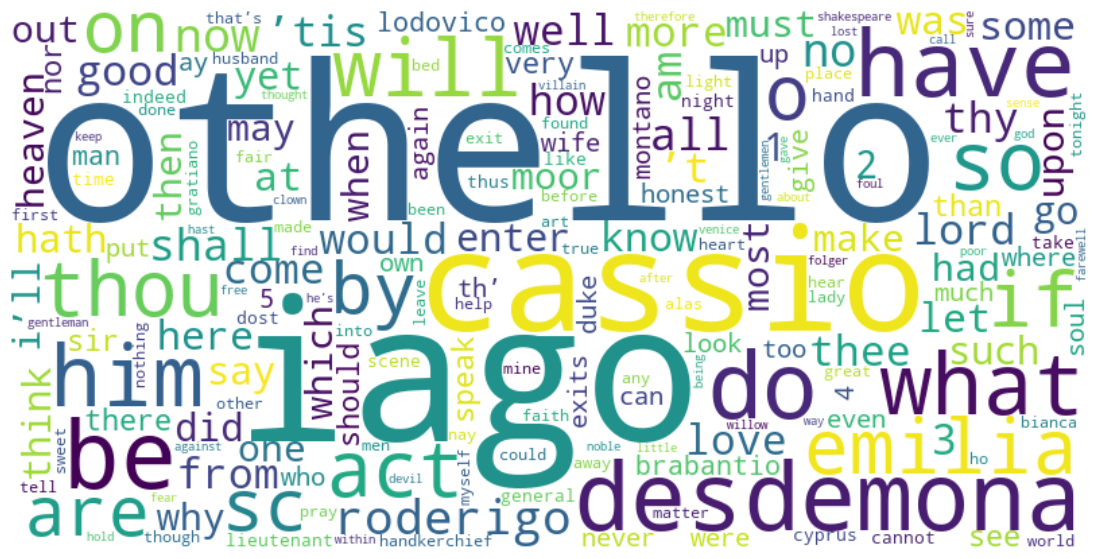

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Supponiamo che tu abbia già la lista di unigrams puliti (unigrams_cleaned)
# Ricontiamo le frequenze
unigrams_count = Counter(unigrams_cleaned)

# Creiamo la word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(unigrams_count)

# Visualizziamo la word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conteggio frasi interrogative

L’obiettivo è analizzare le frasi interrogative presenti nel PDF. Come detto, considereremo solo le frasi interrogative dirette, ovvero tutte le frasi che finiscono con “?”.

Per fare questo utilizzeremo una tecnica chiamata **regex**, uno strumento per cercare pattern specifici all’interno di un testo. 
L'idea di base è quella di dividere il testo (full_text) in frasi basandoci sulla punteggiatura (ovvero i segni grafici ".", "!" e "?") e poi creare una variabile frasi_interrogative prendendo solo quelle che finisco per ?:

In [48]:
import re

In [49]:
frasi_interrogative = re.findall(r'[^.?!]*\?', full_text)

`re.findall(r'[^.?!]*\?', full_text)`: findall è un comando che **restituisce una lista di tutte le frasi che soddisfano un certo pattern**. 

In questo caso, il **pattern** viene definito come `[^.?!]*` e ci permette di catturare tutti i caratteri fino a un punto, punto esclamativo o punto interrogativo, senza includerli. Poiché l’obiettivo è individuare solo le frasi interrogative, il pattern include `\?` alla fine. 
Questo fa sì che la regex catturi esclusivamente le sequenze di testo che terminano con un punto interrogativo, ignorando tutte le altre frasi. 

Il risultato è quindi una **lista** che contiene solo le frasi interrogative del testo. 

Per contare il numero di frasi interrogative nel testo basterà a questo punto calcolare la **lunghezza** delle lista di frasi interrogative (utilizzando la funzione `len()`): 

In [50]:
frasi_interrogative = re.findall(r'[^.?!“”"—]+\?', full_text)

Per controllare, possiamo controllare i primi 5 elementi della lista:

In [51]:
for q in frasi_interrogative[:5]:
    print("-", q.strip())

- What is the difference?
- Who hath relieved/you?
- And what was he?
- What is the reason of this terrible summons?
- What is the matter there?


## Analisi Keywords
La seconda parte dell'analisi consiste nel verificare quante di queste frasi contengono determinate parole chiave. Per farlo si utilizza un dizionario Python chiamato counts, in cui ogni chiave rappresenta una parola o un gruppo di parole chiave ("jealousy", "love", "white", "moor") e il valore associato indica quante volte quella parola compare nelle frasi interrogative. All’inizio tutti i valori sono impostati a zero, perché non è ancora stato effettuato alcun conteggio.

In [52]:
tutte_frasi = re.split(r'[.?!]\s*', full_text) #non si tratta solo di frasi interrogative

In [53]:
counts = {
    "jealousy": 0,
    "love": 0,
    "white": 0,
    "moor": 0
}

Si scorre poi ogni frase della lista e, per semplificare la ricerca, si converte la frase in **minuscolo**. Questo permette di riconoscere le parole chiave indipendentemente dal fatto che siano scritte in maiuscolo o minuscolo.

Per ciascuna frase si utilizza una regex per verificare se contiene una delle **parole chiave**. 
Ad esempio, per contare quante volte compare “desdemona”, la regex `\bdesdemona\b` cerca la parola come elemento separato e, se presente, incrementa di 1 il valore corrispondente nel dizionario.

Al termine di questo processo, il dizionario counts conterrà il numero di frasi in cui compare ciascuna parola chiave, offrendo così una panoramica chiara della frequenza delle frasi basate sulle parole chiave nel testo.

In [54]:
for q in tutte_frasi:
    q_lower = q.lower()
    
    if re.search(r'\bjealous(y)?\b', q_lower):
        counts["jealousy"] += 1
    
    if re.search(r'\blove\b', q_lower):
        counts["love"] += 1
    
    if re.search(r'\bwhite\b', q_lower):
        counts["white"] += 1
    
    if re.search(r'\bmoor\b', q_lower):
        counts["moor"] += 1

### Illustrare i risultati

Possiamo illustrare i risultati in maniera discorsiva: 

In [55]:
print("Risultati:")
print(f"- Totale frasi interrogative: {len(frasi_interrogative)}")
print(f"- Con Jealousy: {counts['jealousy']}")
print(f"- Con Love: {counts['love']}")
print(f"- Con White: {counts['white']}")
print(f"- Con Moor: {counts['moor']}")

Risultati:
- Totale frasi interrogative: 501
- Con Jealousy: 19
- Con Love: 79
- Con White: 2
- Con Moor: 56


Oppure possiamo creare dei grafici:

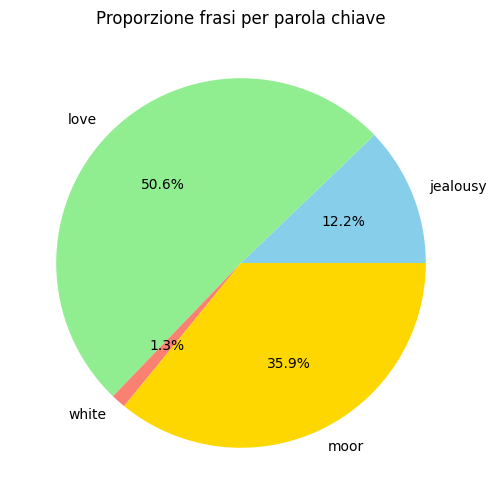

In [56]:
import matplotlib.pyplot as plt #importiamo la libreria matplotlib per creare il grafico

categorie = list(counts.keys()) #"was","wie_inwiefern_aufwelcheweise","warum","welcher"
valori = list(counts.values()) #il conteggio calcolato di ciascuna occorrenza

# Possibilità 1: Grafico a torta con % di occorrenza

plt.figure(figsize=(6,6))
plt.pie(valori, labels=categorie, autopct="%1.1f%%", colors=['skyblue','lightgreen','salmon','gold'])
plt.title("Proporzione frasi per parola chiave")
plt.show()

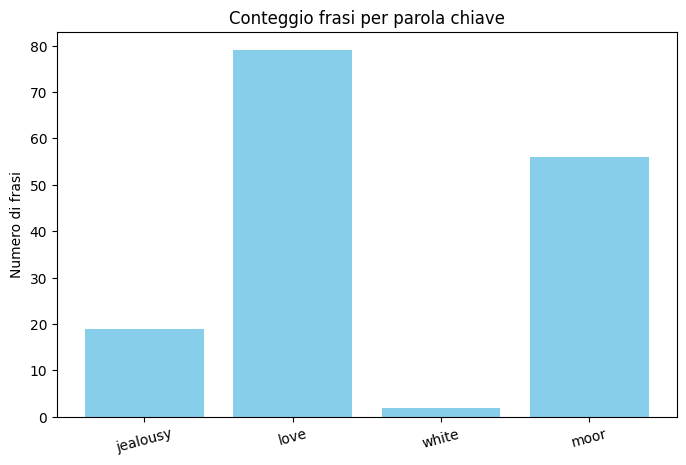

In [57]:
# Possibilità 2: Grafico a colonne con valori assoluti

plt.figure(figsize=(8,5))
plt.bar(categorie, valori, color='skyblue')
plt.title("Conteggio frasi per parola chiave")
plt.ylabel("Numero di frasi")
plt.xticks(rotation=15)  # ruota le etichette per leggibilità
plt.show()